- Martina Leocata 636189
- Irene Mondella 584285 
- Elena Scaglione 645638

### Import librerie, impostazione di stile, definizione funzioni ausiliarie

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from plotly.offline import iplot # per usare iplot offline
import plotly as py
import cufflinks as cf
import plotly.express as px # libreria per visualizzare gli outliers nei boxplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

# Colori e stile
colors1 = ['#99d8c9','#80A9D7']
colors = sns.color_palette('pastel')[2:9]
colors3 = ['#D0C4F3', '#E8AEAA', '#D8BC9F','#A1E3A7']
color_palette = sns.color_palette("husl", 9)
sns.set_palette(color_palette)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
sns.set_style("darkgrid")

# Funzioni ausiliarie
def calcolaSizes(df, labels, variable):
  '''Calcola la grandezza delle fette per i grafici a torta'''
  list_sizes = []
  for label in labels:
    if len(df[df[variable] == label]) > 0:
      list_sizes.append((len(df[df[variable] == label])))
  return list_sizes

def grandezzaGrafico(x,y):
    plt.rcParams['figure.figsize'] = [x,y]

def eliminaSpazi(df, col):
      for i in df.index:
        df.loc[i, col] = df[col][i].rstrip()
           

In [2]:
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [4]:
df.shape

(311, 36)

In [5]:
# creiamo la colonna Age a partire dalla colonna DOB
df['Age'] = df.DOB
index=0
for i in df.DOB:
    df.loc[index,'Age']= 122 - int((i[-2:]))
    index +=1

df["Age"] = pd.to_numeric(df["Age"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Data Cleaning

In [7]:
eliminaSpazi(df,'Department')
eliminaSpazi(df,'Sex')

In [8]:
df.isna().any()

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

In [9]:
# cerchiamo le colonne contenenti NaN
for e in list(df.columns):
    if df[e].isna().any():
        print('Colonna con NaN:', e, '\t|\tNumero NaN:' ,df[e].isna().sum())

Colonna con NaN: DateofTermination 	|	Numero NaN: 207
Colonna con NaN: ManagerID 	|	Numero NaN: 8


In [10]:
df[df['DateofTermination'].isna()]['EmploymentStatus'].unique()
# nella colonna DateofTermination, gli unici valori NaN sono quelli dei dipendenti ancora attivi nell'azienda

array(['Active'], dtype=object)

In [11]:
df[df['ManagerID'].isna()]['ManagerName'].unique()
# nella colonna ManagerID, gli unici valori NaN sono quelli riferiti al manager Webster Butler

array(['Webster Butler'], dtype=object)

In [12]:
# individuiamo il ManagerID di Webster Butler
df_manager= df[df['ManagerName'] == 'Webster Butler'][['ManagerName','ManagerID']]
list(df_manager['ManagerID'].unique())

[39.0, nan]

In [13]:
# sostituiamo l'ID trovato ai valori NaN
df['ManagerID'].fillna(list(df_manager['ManagerID'].unique())[0],inplace=True)

df['ManagerID'].unique()

array([22.,  4., 20., 16., 39., 11., 10., 19., 12.,  7., 14., 18.,  3.,
        2.,  1., 17.,  5., 21.,  6., 15., 13.,  9., 30.])

# Data Understanding

In [14]:
df[['EngagementSurvey','Salary','EmpSatisfaction','SpecialProjectsCount',
             'PerfScoreID','DaysLateLast30', 'Age', 'Absences']].describe()

,EngagementSurvey,Salary,EmpSatisfaction,SpecialProjectsCount,PerfScoreID,DaysLateLast30,Age,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,4.110000,69020.684887,3.890675,1.218650,2.977492,0.414791,43.408360,10.237942
std,0.789938,25156.636930,0.909241,2.349421,0.587072,1.294519,8.870236,5.852596
min,1.120000,45046.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000
25%,3.690000,55501.500000,3.000000,0.000000,3.000000,0.000000,36.000000,5.000000
50%,4.280000,62810.000000,4.000000,0.000000,3.000000,0.000000,42.000000,10.000000
75%,4.700000,72036.000000,5.000000,0.000000,3.000000,0.000000,49.000000,15.000000
max,5.000000,250000.000000,5.000000,8.000000,4.000000,6.000000,71.000000,20.000000


### Salario

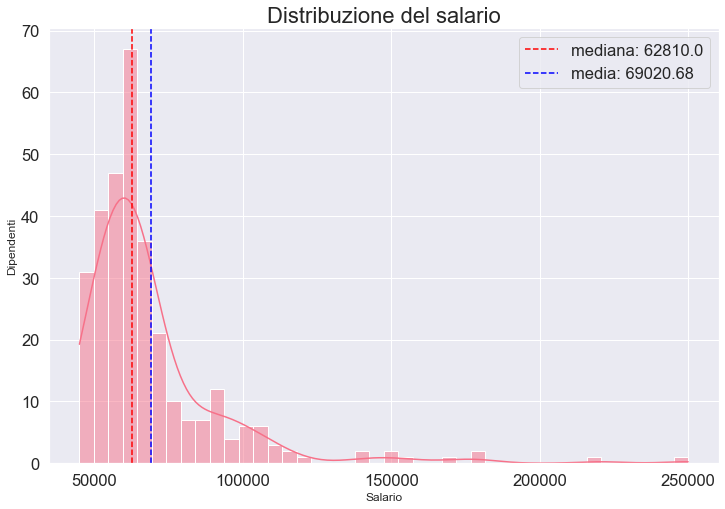

In [15]:
var = 'Salary'
grandezzaGrafico(12,8)
sns.histplot(df[var], kde=True)
media_salario = df.Salary.mean()
mediana_salario = df.Salary.median()
plt.axvline(mediana_salario, color='r', linestyle = '--', label=f'mediana: {round(mediana_salario,2)}')
plt.axvline(media_salario, color='b', linestyle = '--', label=f'media: {round(media_salario,2)}')
plt.title('Distribuzione del salario', fontsize=22)
plt.ylabel('Dipendenti')
plt.xlabel('Salario')
plt.legend(loc=0)
plt.show()

In [16]:
df.Salary.describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [17]:
df.Salary.std(ddof=0)

25116.159611505253

In [18]:
cv_salario = df.Salary.std()/ df.Salary.mean() * 100
print(f'CV: {round(cv_salario, 2)}%')

CV: 36.45%


In [19]:
Q1_salario = df['Salary'].quantile(0.25, interpolation='linear')
Q3_salario = df['Salary'].quantile(0.75, interpolation='linear')
differenza_interquartile_salario = Q3_salario-Q1_salario
Lowerfence_salario = Q1_salario - 1.5*differenza_interquartile_salario #calcolo il limite inferiore
Upperfence_salario = Q3_salario + 1.5*differenza_interquartile_salario #calcolo il limite superiore
print("Il limite inferiore è", Lowerfence_salario, ", mentre quello superiore è", Upperfence_salario)

Il limite inferiore è 30699.75 , mentre quello superiore è 96837.75


In [20]:
#dataframe contenente soltanto gli outliers del salario
outliers_salario = df.loc[(df['Salary'] < Lowerfence_salario)  |  (df['Salary'] > Upperfence_salario) ]
outliers_salario.shape

(29, 37)

In [21]:
#dataframe contenente soltanto i valori di salario normali
df_salario_normalizzato = df.loc[(df['Salary'] > Lowerfence_salario)  & (df['Salary'] < Upperfence_salario) ]

df_salario_normalizzato.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,39
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,34
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,34
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,33
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15,45


In [22]:
df_salario_normalizzato['Salary'].describe()

count      282.000000
mean     62841.645390
std      11651.357909
min      45046.000000
25%      54381.250000
50%      61620.000000
75%      67221.750000
max      96820.000000
Name: Salary, dtype: float64

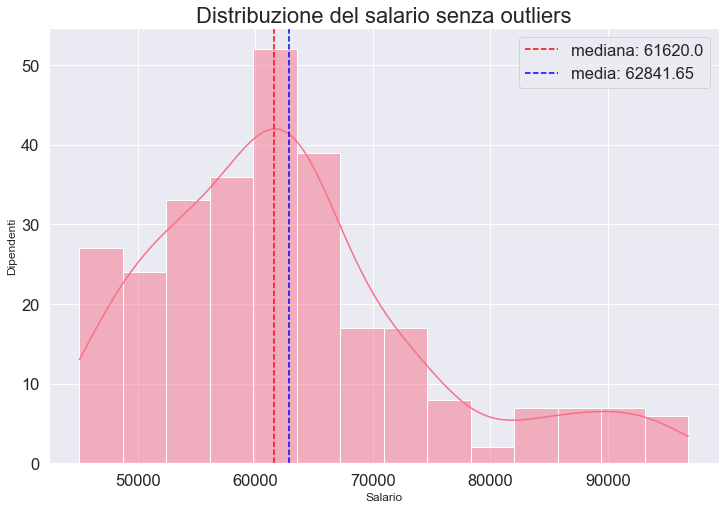

In [23]:
#Istogramma del salario senza outliers
grandezzaGrafico(12,8)
sns.histplot(df_salario_normalizzato['Salary'], kde=True)
media_salario = df_salario_normalizzato.Salary.mean()
mediana_salario = df_salario_normalizzato.Salary.median()
plt.axvline(mediana_salario, color='r', linestyle = '--', label=f'mediana: {round(mediana_salario,2)}')
plt.axvline(media_salario, color='b', linestyle = '--', label=f'media: {round(media_salario,2)}')
plt.title('Distribuzione del salario senza outliers', fontsize=22)
plt.ylabel('Dipendenti')
plt.xlabel('Salario')
plt.legend(loc=0)
plt.show()

In [24]:
Skew_salario = df['Salary'].skew()
print('La skewness del salario è', round(Skew_salario, 3), 'quindi i dati sono molto distorti.')
Skew_salario_normalizzato = df_salario_normalizzato['Salary'].skew()
print('La skewness del salario normalizzato è', round(Skew_salario_normalizzato,3), 'quindi i dati sono sì distorti ma molto meno di quelli contenenti outliers')

La skewness del salario è 3.306 quindi i dati sono molto distorti.
La skewness del salario normalizzato è 0.948 quindi i dati sono sì distorti ma molto meno di quelli contenenti outliers


In [25]:
#definiamo un dataset contenente soltanto i dipendenti ancora attivi nell'azienda
df_active = df[df['EmploymentStatus'] == 'Active']

df_active['Salary_zscore'] = sp.zscore(df_active['Salary'])
df_active['Rank'] = df_active['Salary'].rank(method='min', ascending=False, pct=False)
df_active['Rank'] = df_active['Rank'].apply(int)
# I 10 impiegati che guadagnano di più
df_active.nlargest(10, 'Salary')[['Rank','Employee_Name', 'Salary','Position','Salary_zscore',]].style.hide_index()

Rank,Employee_Name,Salary,Position,Salary_zscore
1,"King, Janet",250000,President & CEO,6.479612
2,"Zamora, Jennifer",220450,CIO,5.411758
3,"Houlihan, Debra",180000,Director of Sales,3.950009
4,"Foss, Jason",178000,IT Director,3.877735
5,"Corleone, Vito",170500,Director of Operations,3.606706
6,"Monroe, Peter",157000,IT Manager - Infra,3.118854
7,"Roper, Katie",150290,Data Architect,2.876374
8,"Roup,Simon",140920,IT Manager - DB,2.537768
9,"Dougall, Eric",138888,IT Manager - Support,2.464338
10,"Champaigne, Brian",110929,BI Director,1.453978


In [26]:
# I 10 impiegati che guadagnano di meno
df_active.nsmallest(10, 'Salary')[['Rank','Employee_Name', 'Salary','Position','Salary_zscore',]].style.hide_index()

Rank,Employee_Name,Salary,Position,Salary_zscore
207,"Zima, Colleen",45046,Production Technician I,-0.926848
206,"Jacobi, Hannah",45069,Production Technician I,-0.926016
205,"Mahoney, Lauren",45395,Production Technician I,-0.914236
204,"Langton, Enrico",46120,Production Technician I,-0.888036
203,"Dobrin, Denisa S",46335,Production Technician I,-0.880267
202,"Knapp, Bradley J",46654,Production Technician I,-0.868739
201,"Rivera, Haley",46738,Production Technician I,-0.865703
200,"Heitzman, Anthony",46998,Production Technician I,-0.856308
199,"Pitt, Brad",47001,Production Technician I,-0.856199
198,"Osturnka, Adeel",47414,Production Technician I,-0.841275


### Età

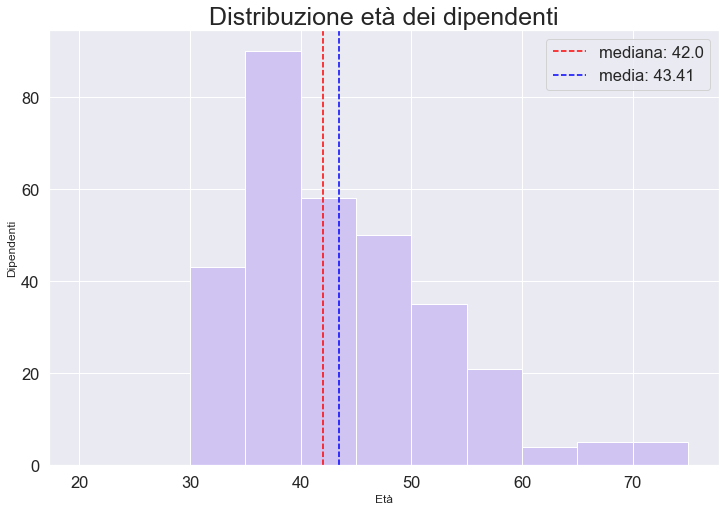

In [27]:
grandezzaGrafico(12,8)
sns.set_palette(colors3)
plt.hist(df['Age'], edgecolor='w', bins=np.arange(20,80,5))
media_age = df['Age'].mean()
mediana_age = df['Age'].median()
plt.axvline(mediana_age, color='r', linestyle = '--', label=f'mediana: {round(mediana_age,2)}')
plt.axvline(media_age, color='b', linestyle = '--', label=f'media: {round(media_age,2)}')
plt.xlabel('Età')
plt.ylabel('Dipendenti')
plt.title('Distribuzione età dei dipendenti', fontsize=25)
plt.legend(loc=0)
plt.show()

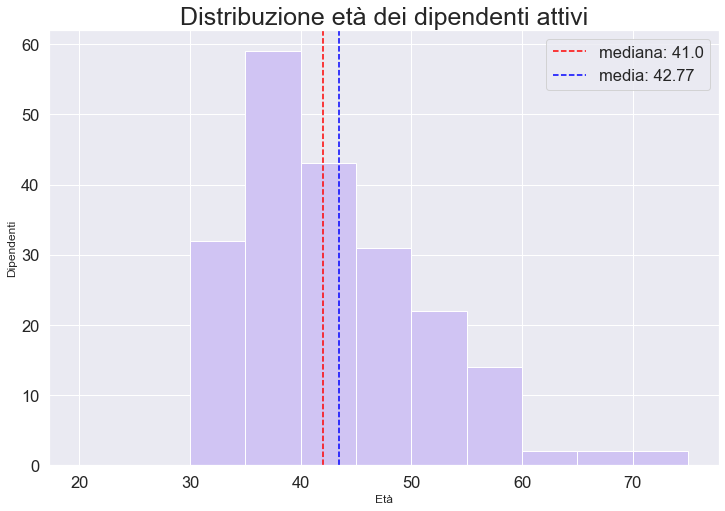

In [28]:
plt.hist(df_active['Age'], edgecolor='w',bins=np.arange(20,80,5))
media_ageAct = df_active['Age'].mean()
mediana_ageAct = df_active['Age'].median()
plt.axvline(mediana_age, color='r', linestyle = '--', label=f'mediana: {round(mediana_ageAct,2)}')
plt.axvline(media_age, color='b', linestyle = '--', label=f'media: {round(media_ageAct,2)}')
plt.xlabel('Età')
plt.ylabel('Dipendenti')
plt.title('Distribuzione età dei dipendenti attivi', fontsize=25)
plt.legend(loc=0)
plt.savefig('età.png')
plt.show()

In [29]:
df.Age.describe()

count    311.000000
mean      43.408360
std        8.870236
min       30.000000
25%       36.000000
50%       42.000000
75%       49.000000
max       71.000000
Name: Age, dtype: float64

In [30]:
Q1_età = df['Age'].quantile(0.25, interpolation='linear')
Q3_età = df['Age'].quantile(0.75, interpolation='linear')
differenza_interquartile_età = Q3_età - Q1_età
Lowerfence_età = Q1_età - 1.5*differenza_interquartile_età #calcolo il limite inferiore
Upperfence_età = Q3_età + 1.5*differenza_interquartile_età #calcolo il limite superiore

#dataframe contenente gli outliers dell'età
outliers_età = df.loc[(df['Age'] < Lowerfence_età)  |  (df['Age'] > Upperfence_età) ]

#dataframe contenente solo i valori normali di età e di salario: tutti gli outliers di entrambe le variabili sono stati rimossi
df_età_salario_normalizzati = df_salario_normalizzato.loc[(df['Age'] > Lowerfence_età)  & (df['Age'] < Upperfence_età) ]

df_età_salario_normalizzati['Age'].describe()

count    276.000000
mean      42.750000
std        8.050692
min       30.000000
25%       36.000000
50%       41.000000
75%       48.000000
max       68.000000
Name: Age, dtype: float64

In [31]:
Skew_età = df['Age'].skew()
print("La skewness dell'età è", round(Skew_età,3), 'quindi i dati sono moderatamente distorti.')
Skew_età_normalizzata = df_età_salario_normalizzati['Age'].skew()
print("La skewness dell'età normalizzata è", round(Skew_età_normalizzata,3),"quindi i dati sono sì distorti ma un po' meno.")

La skewness dell'età è 0.951 quindi i dati sono moderatamente distorti.
La skewness dell'età normalizzata è 0.734 quindi i dati sono sì distorti ma un po' meno.


### Genere

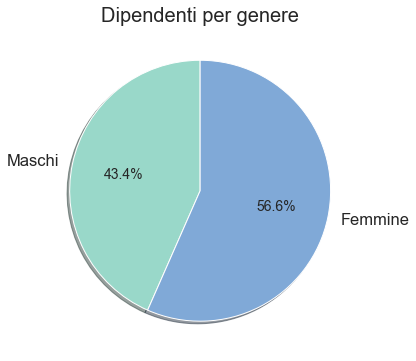

In [32]:
sizes = [len(df[df['Sex'] =='M']), len(df[df['Sex'] =='F'])]
labels = ['Maschi', 'Femmine']
grandezzaGrafico(10, 6)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors1[0:3])
plt.title('Dipendenti per genere', fontsize=20)
plt.show()

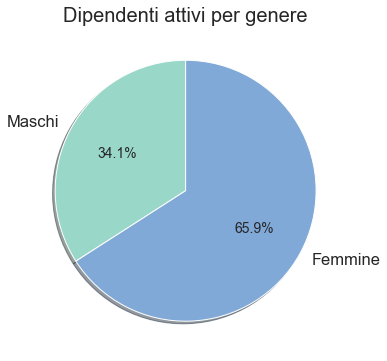

In [33]:
sizes = [len(df_active[df_active['Sex'] =='M']), len(df[df['Sex'] =='F'])]
labels = ['Maschi', 'Femmine']
grandezzaGrafico(10, 6)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors1[0:3])
plt.title('Dipendenti attivi per genere', fontsize=20)
plt.show()

### Etnia

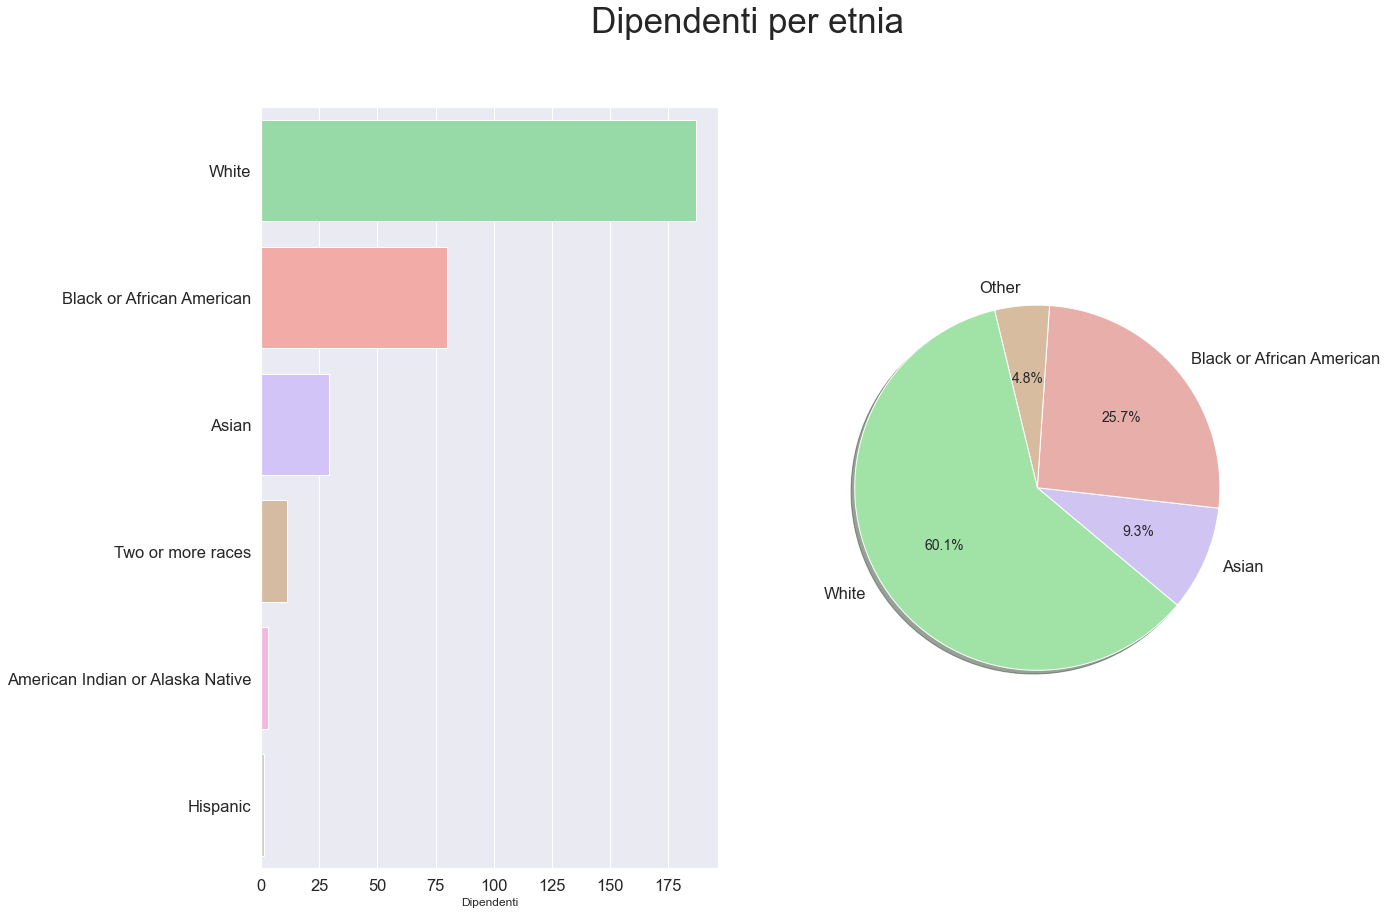

In [34]:
df_race = df.groupby(['RaceDesc']).count()['Employee_Name']

df_race.loc['Hispanic'] += df_race.loc['Two or more races'] + df_race.loc['American Indian or Alaska Native']
df_race.drop(['Two or more races', 'American Indian or Alaska Native'], inplace=True)
df_race.rename(index = {"Hispanic": "Other"}, inplace=True)

grandezzaGrafico(18,14)
plt.subplot(1,2,1)
sns.set_palette(colors)
sns.countplot(y = 'RaceDesc', data = df, order = df['RaceDesc'].value_counts().index)
plt.suptitle('Dipendenti per etnia', fontsize=35)
plt.xlabel('Dipendenti')
plt.ylabel('')

plt.subplot(1,2,2) 
plt.pie(x=df_race, labels=df_race.index, autopct='%1.1f%%', shadow=True, startangle=320, colors = colors3)
plt.show()

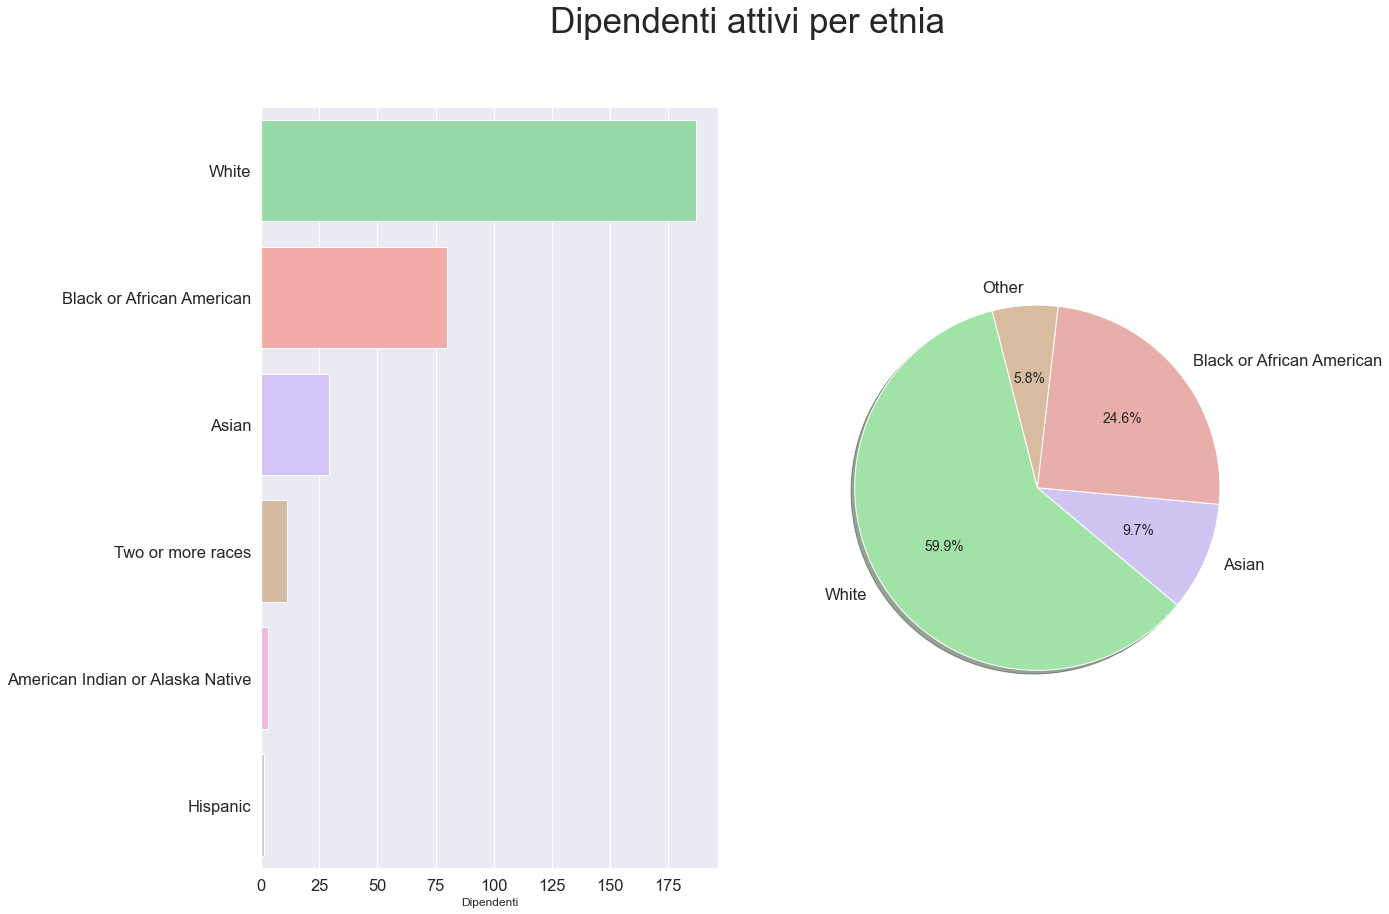

In [35]:
df_race = df_active.groupby(['RaceDesc']).count()['Employee_Name']

df_race.loc['Hispanic'] += df_race.loc['Two or more races'] + df_race.loc['American Indian or Alaska Native']
df_race.drop(['Two or more races', 'American Indian or Alaska Native'], inplace=True)
df_race.rename(index = {"Hispanic": "Other"}, inplace=True)

grandezzaGrafico(18,14)
plt.subplot(1,2,1)
sns.set_palette(colors)
sns.countplot(y = 'RaceDesc', data = df, order = df['RaceDesc'].value_counts().index)
plt.suptitle('Dipendenti attivi per etnia', fontsize=35)
plt.xlabel('Dipendenti')
plt.ylabel('')

plt.subplot(1,2,2) 
plt.pie(x=df_race, labels=df_race.index, autopct='%1.1f%%', shadow=True, startangle=320, colors = colors3)
plt.show()

### Reparti

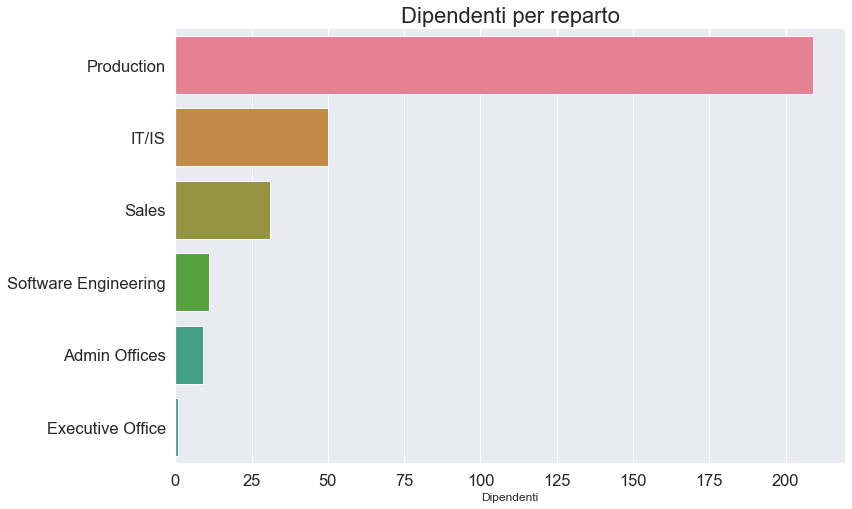

In [36]:
grandezzaGrafico(12,8)
sns.set_palette(color_palette)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
sns.countplot(y = 'Department', data = df, order = df['Department'].value_counts().index)
plt.title('Dipendenti per reparto', fontsize=22)
plt.xlabel('Dipendenti')
plt.ylabel('')
plt.show()

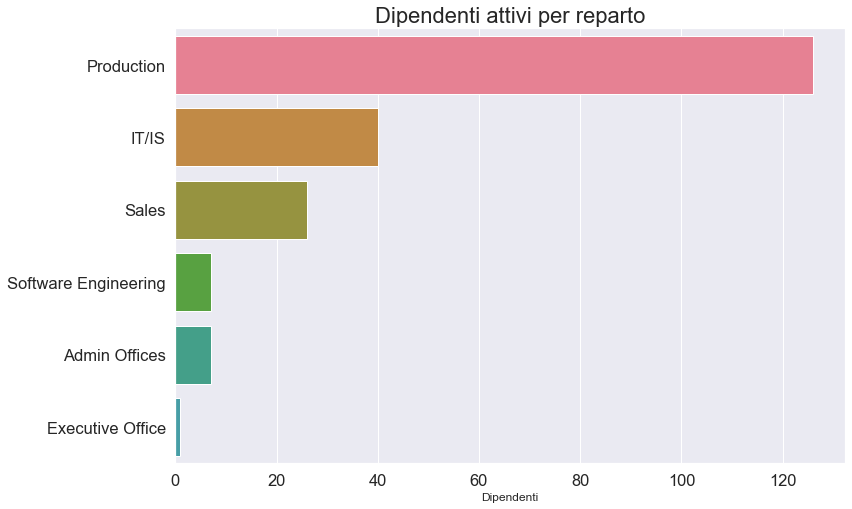

In [37]:
grandezzaGrafico(12,8)
sns.set_palette(color_palette)
sns.set_palette(color_palette)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
sns.countplot(y = 'Department', data = df_active, order = df_active['Department'].value_counts().index)
plt.title('Dipendenti attivi per reparto', fontsize=22)
plt.xlabel('Dipendenti')
plt.ylabel('')
plt.show()

In [38]:
df_active['Department'].value_counts()

Production              126
IT/IS                    40
Sales                    26
Software Engineering      7
Admin Offices             7
Executive Office          1
Name: Department, dtype: int64

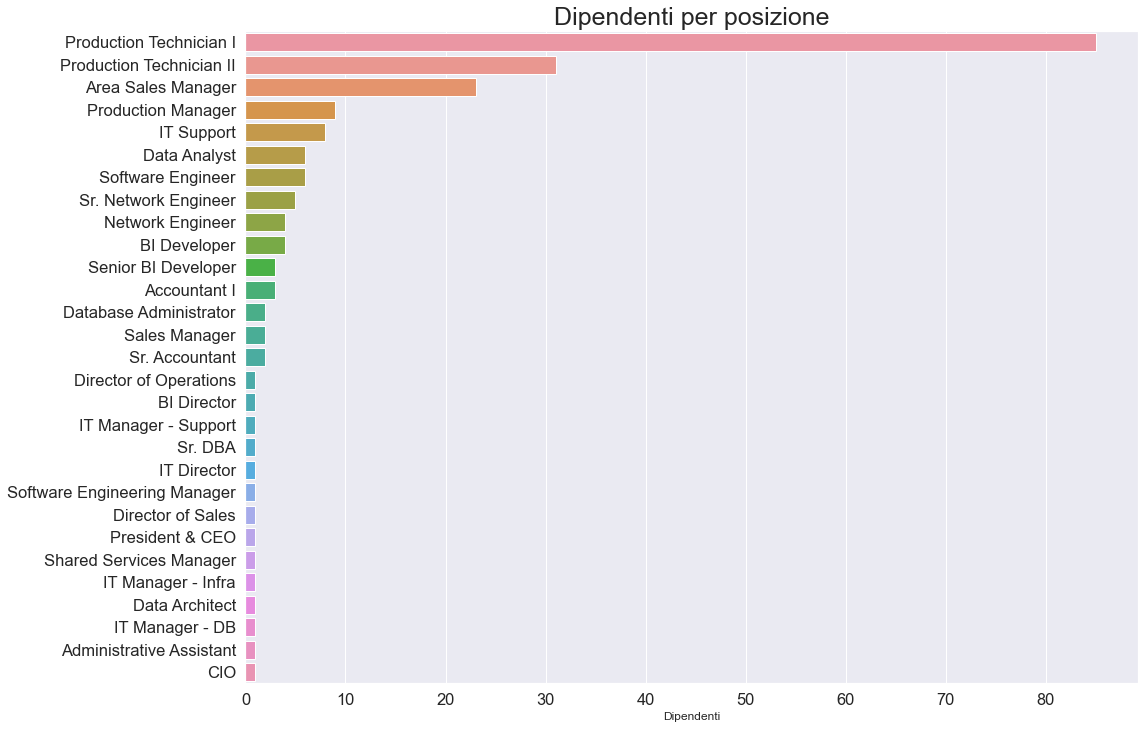

In [39]:
var = 'Position'
grandezzaGrafico(16,12)

sns.countplot(y = var, data = df_active, order = df_active[var].value_counts().index)
plt.title('Dipendenti per posizione', fontsize=25)
plt.xlabel('Dipendenti')
plt.xticks(rotation = 0)
plt.ylabel('')
plt.show()

In [40]:
df_active[var].value_counts()

Production Technician I         85
Production Technician II        31
Area Sales Manager              23
Production Manager               9
IT Support                       8
Data Analyst                     6
Software Engineer                6
Sr. Network Engineer             5
Network Engineer                 4
BI Developer                     4
Senior BI Developer              3
Accountant I                     3
Database Administrator           2
Sales Manager                    2
Sr. Accountant                   2
Director of Operations           1
BI Director                      1
IT Manager - Support             1
Sr. DBA                          1
IT Director                      1
Software Engineering Manager     1
Director of Sales                1
President & CEO                  1
Shared Services Manager          1
IT Manager - Infra               1
Data Architect                   1
IT Manager - DB                  1
Administrative Assistant         1
CIO                 

### Performance Score

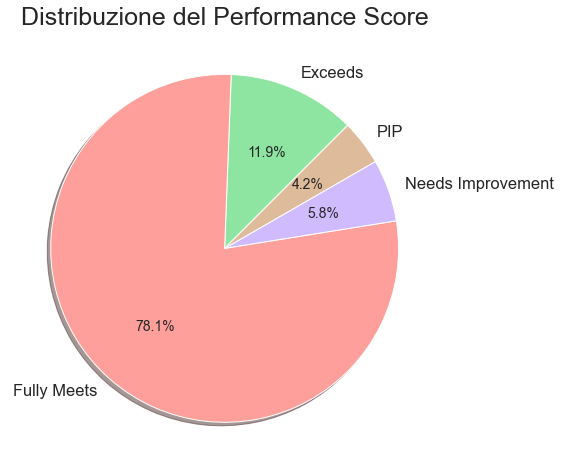

In [41]:
sizes = [len(df[df['PerformanceScore'] == 'Exceeds']),len(df[df['PerformanceScore'] == 'Fully Meets']) ,
         len(df[df['PerformanceScore'] == 'Needs Improvement']),
         len(df[df['PerformanceScore'] == 'PIP'])]
labels = list(df.PerformanceScore.unique())
grandezzaGrafico(12,8)
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45, colors = colors)
plt.title('Distribuzione del Performance Score', fontsize=25)
plt.show()

### Attivi e Inattivi

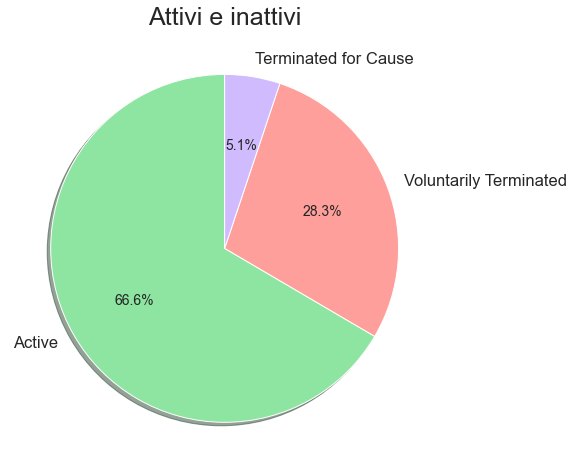

In [42]:
df_terminated1 = df[df['EmploymentStatus'] == 'Voluntarily Terminated']
df_terminated2 = df[df['EmploymentStatus'] == 'Terminated for Cause']

sizes = [len(df_active), len(df_terminated1), len(df_terminated2)]
labels = list(df.EmploymentStatus.unique())

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors)
plt.title('Attivi e inattivi', fontsize=25)
plt.show()

### Sondaggio di coinvolgimento

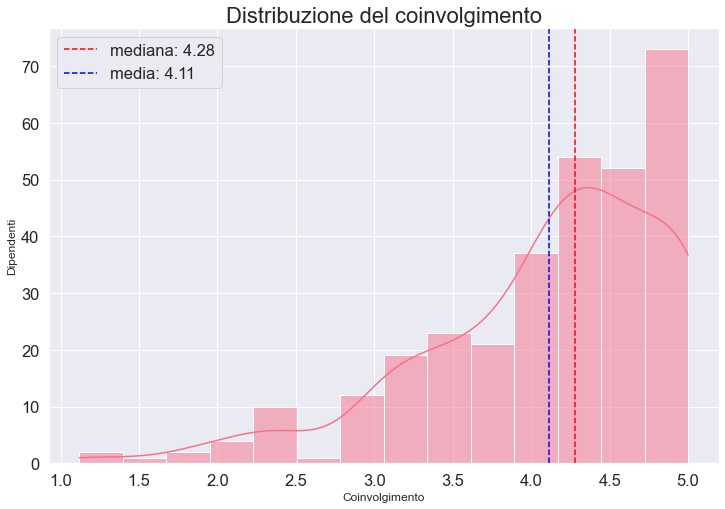

In [43]:
var = 'EngagementSurvey'
grandezzaGrafico(12,8)
sns.histplot(df[var], kde=True)
media_coinvolgimento = df[var].mean()
mediana_coinvolgimento = df[var].median()
plt.axvline(mediana_coinvolgimento, color='r', linestyle = '--', label=f'mediana: {round(mediana_coinvolgimento,2)}')
plt.axvline(media_coinvolgimento, color='b', linestyle = '--', label=f'media: {round(media_coinvolgimento,2)}')
plt.legend(loc=0)
plt.title('Distribuzione del coinvolgimento', fontsize=22)
plt.xlabel('Coinvolgimento')
plt.ylabel('Dipendenti')
plt.show()

In [44]:
df[var].describe()

count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64

### Assunti, dimessi e licenziati per anno

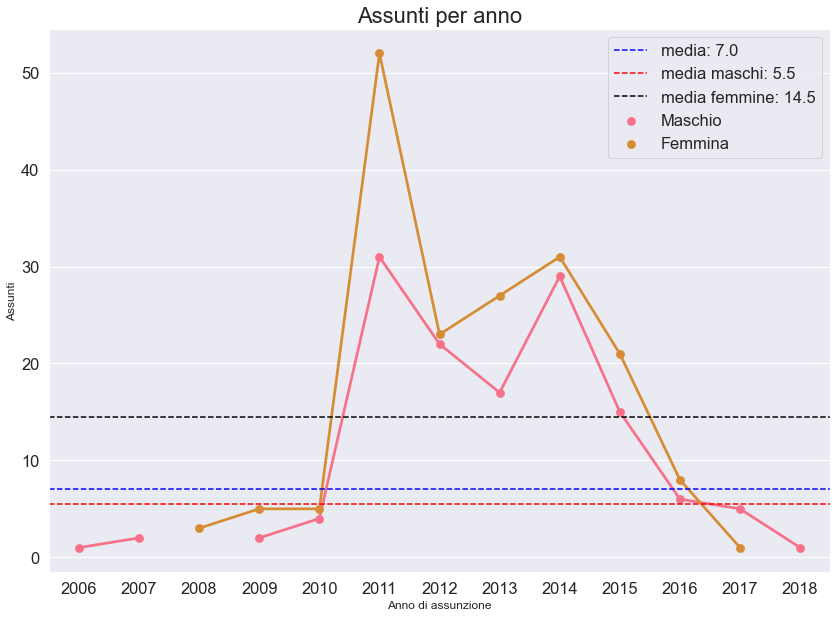

In [45]:
# creiamo la colonna Hiring_Year a partire da DateofHire
df['Hiring_Year'] = df['DateofHire']

for i in df.index:
  df.loc[i, 'Hiring_Year'] = df['Hiring_Year'][i][-4:]

df_hire = df.sort_values('Hiring_Year')
for i in df_hire.index:
  if df_hire['Sex'][i] == 'M':
    df_hire.loc[i, 'Sex'] = ['Maschio']
  elif df_hire['Sex'][i] == 'F':
     df_hire.loc[i, 'Sex'] = ['Femmina']

df_hire = df_hire.groupby(['Hiring_Year', 'Sex']).count()['Employee_Name'].reset_index()
maschi = df_hire[df_hire['Sex'] == 'Maschio']
femmine = df_hire[df_hire['Sex'] == 'Femmina']

media_assunti = df_hire.Employee_Name.median()
media_maschi = maschi['Employee_Name'].median()
media_femmine = femmine['Employee_Name'].median()

grandezzaGrafico(14,10)
sns.pointplot(x='Hiring_Year', y='Employee_Name', data=df_hire, hue='Sex')
plt.axhline(media_assunti, color = 'blue', linestyle = '--', label=f'media: {round(media_assunti,2)}' )
plt.axhline(media_maschi, color = 'red', linestyle = '--' , label=f'media maschi: {round(media_maschi,2)}')
plt.axhline(media_femmine, color = 'black', linestyle = '--' ,label=f'media femmine: {round(media_femmine,2)}')

plt.title('Assunti per anno', fontsize=22)
plt.xlabel('Anno di assunzione')
plt.ylabel('Assunti')
plt.legend(loc=0)
plt.show()

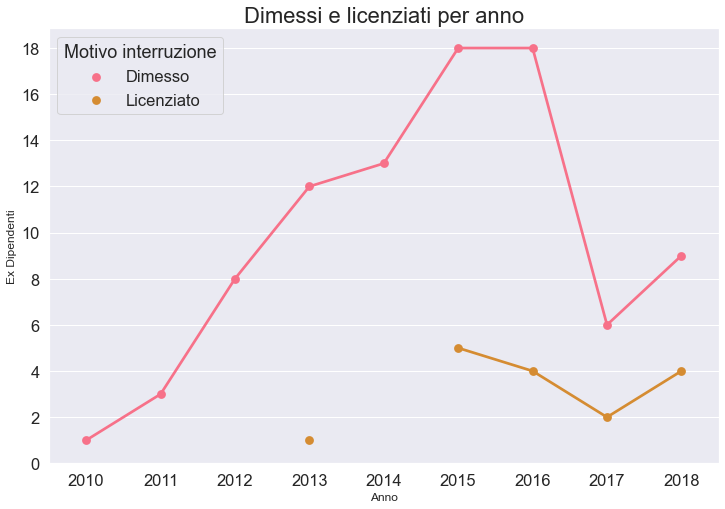

In [46]:
import re

# definiamo un dataset contenente soltanto i dipendenti non più attivi
df_term = df[df['EmploymentStatus'] != 'Active'].copy()


# creiamo la colonna Termination_Year a partire da DateofTermination
df_term['Termination_Year'] = df_term['DateofTermination']
df_term['Termination_Year'] = df_term['Termination_Year'].replace(to_replace=r'(\d\d?/\d\d?/)(\d\d\d\d)',value=r'\2', regex=True)

    
df_term = df_term.sort_values('Termination_Year')
df_term = df_term.groupby(['Termination_Year', 'EmploymentStatus']).count()['Employee_Name'].reset_index()
for i in df_term.index:
  if df_term['EmploymentStatus'][i] == 'Voluntarily Terminated':
    df_term.loc[i, 'EmploymentStatus'] = ['Dimesso']
  elif df_term['EmploymentStatus'][i] == 'Terminated for Cause':
     df_term.loc[i, 'EmploymentStatus'] = ['Licenziato']

df_term['EmploymentStatus'].unique()

grandezzaGrafico(12,8)
sns.pointplot(x='Termination_Year', y='Employee_Name', data=df_term, hue='EmploymentStatus')

y = np.array([0, 19])
plt.title('Dimessi e licenziati per anno', fontsize=22)
plt.xlabel('Anno')
plt.ylabel('Ex Dipendenti')
plt.yticks(np.arange(y.min(), y.max(), 2))
plt.legend(title='Motivo interruzione')

plt.show()

# Matrici di correlazione

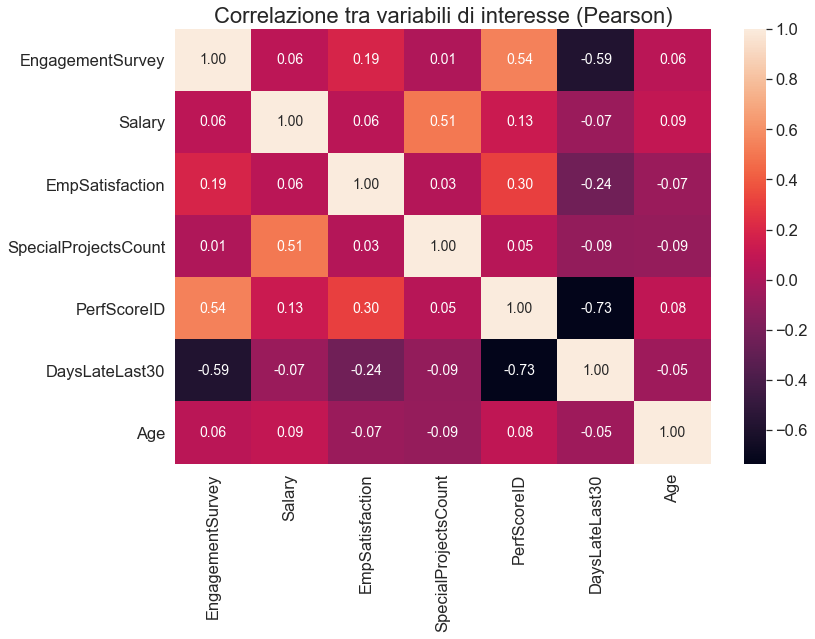

In [47]:
df_heat = df[['EngagementSurvey','Salary','EmpSatisfaction','SpecialProjectsCount',
             'PerfScoreID','DaysLateLast30','Age']].copy()

grandezzaGrafico(12,8)
sns.heatmap(df_heat.corr(), annot=True, fmt='.2f') 
plt.title('Correlazione tra variabili di interesse (Pearson)', fontsize=22 )
plt.show()

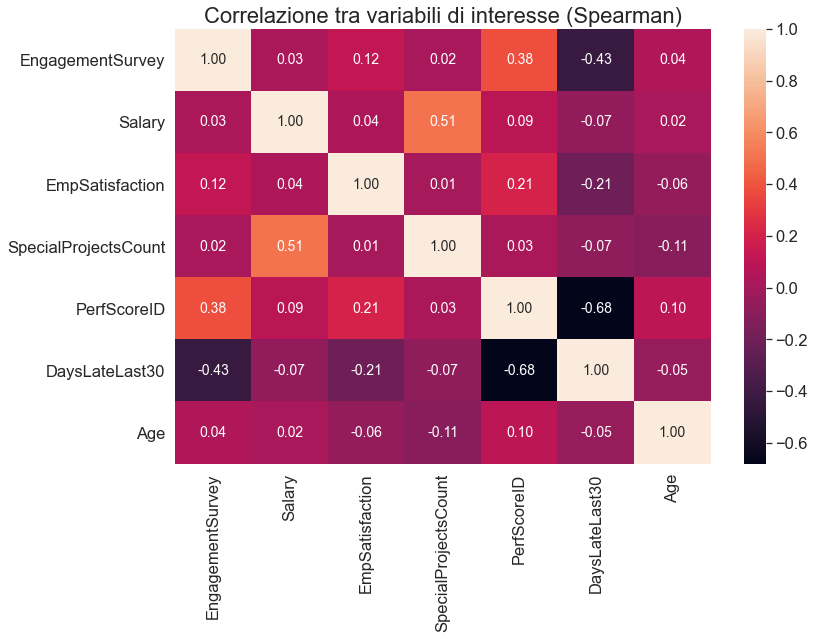

In [48]:
sns.heatmap(df_heat.corr('spearman'), annot=True, fmt='.2f') 
plt.title('Correlazione tra variabili di interesse (Spearman)', fontsize=22 )
plt.show()

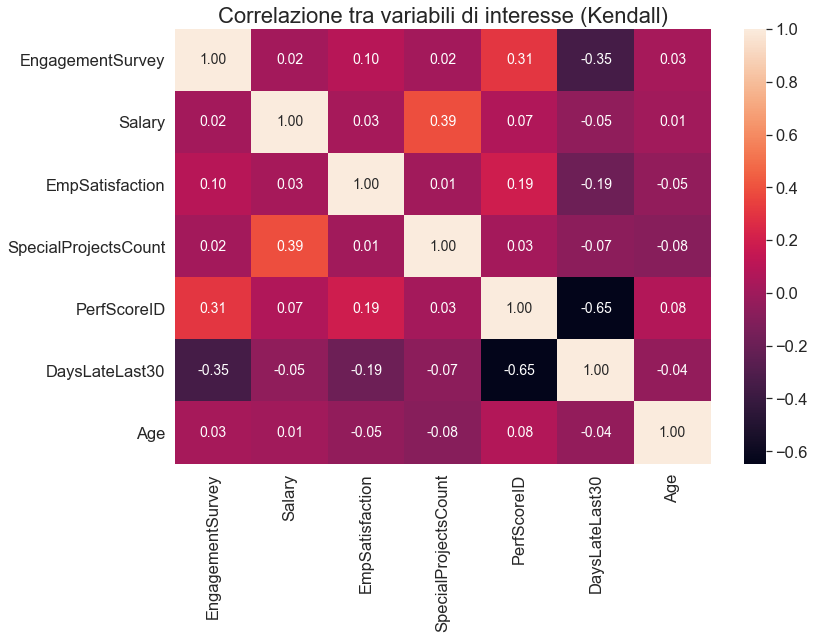

In [49]:
sns.heatmap(df_heat.corr('kendall'), annot=True, fmt='.2f') 
plt.title('Correlazione tra variabili di interesse (Kendall)', fontsize=22 )
plt.show()

# Data Exploration

### Salario ed età

In [50]:
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
grandezzaGrafico(12,8)
df.iplot(x = 'Salary', y = 'Age', mode = 'markers', size = 7, title='Salario per età', xTitle='Salario', yTitle='Età', color='rose')

### Salario e genere

In [51]:
fig = px.box(df, y="Sex", x="Salary",title = 'Salario in base al genere', width= 800, labels = {'Sex': 'Genere', 'Salary': 'Salario'})
fig.show()

In [52]:
fig = px.box(df_active, y="Sex", x="Salary",title = 'Salario attivi in base al genere', width= 800, labels = {'Sex': 'Genere', 'Salary': 'Salario'})
fig.show()

In [53]:
df_active.groupby(["Sex"])["Salary"].describe().reset_index()

,Sex,count,mean,std,min,25%,50%,75%,max
0,F,116.0,70215.568966,29572.559357,45046.0,56291.5,62662.0,70909.75,250000.0
1,M,91.0,71303.945055,25359.595684,46120.0,57283.0,63973.0,75354.00,178000.0


In [54]:
donne_100k = df_active.loc[(df['Salary'] >= 100000)& (df['Sex'] == 'F')].Employee_Name.count()
uomini_100k = df_active.loc[(df['Salary'] >= 100000)& (df['Sex'] == 'M')].Employee_Name.count()

print('Donne che guadagnano più di 100k:', donne_100k)
print('Uomini che guadagnano più di 100k:', uomini_100k)

Donne che guadagnano più di 100k: 10
Uomini che guadagnano più di 100k: 6


### Salario ed etnia

In [55]:
fig = px.box(df, x="RaceDesc", y="Salary", title = 'Salario per etnia', labels = {'RaceDesc': 'Etnia', 'Salary': 'Salario'})
fig.show()

In [56]:
fig = px.box(df_active, x="RaceDesc", y="Salary", title = 'Salario attivi per etnia', labels = {'RaceDesc': 'Etnia', 'Salary': 'Salario'})
fig.show()

In [57]:
df_active.groupby(["RaceDesc"])["Salary"].describe().reset_index()

,RaceDesc,count,mean,std,min,25%,50%,75%,max
0,American Indian or Alaska Native,3.0,65806.000000,4919.476293,60724.0,63436.50,66149.0,68347.00,70545.0
1,Asian,20.0,70384.950000,20271.430862,45046.0,55218.75,64355.5,85568.50,107226.0
2,Black or African American,51.0,76124.941176,31492.674632,46654.0,57354.50,64816.0,73873.50,178000.0
3,Hispanic,1.0,83667.000000,NaN,83667.0,83667.00,83667.0,83667.00,83667.0
4,Two or more races,8.0,58399.000000,5016.166237,47961.0,57434.75,58284.0,61998.75,63695.0
5,White,124.0,69317.072581,28183.440305,45069.0,56672.50,62933.5,70253.50,250000.0


In [58]:
df_active.groupby(["Department", "RaceDesc"])["Salary"].describe()

count           mean  \
Department           RaceDesc                                                 
Admin Offices        Black or African American           3.0   77962.333333   
                     White                               4.0   76830.000000   
Executive Office     White                               1.0  250000.000000   
IT/IS                Asian                               6.0   92483.166667   
                     Black or African American          11.0  111218.272727   
                     White                              23.0   87051.434783   
Production           American Indian or Alaska Native    2.0   63436.500000   
                     Asian                              12.0   57603.083333   
                     Black or African American          28.0   64096.178571   
                     Hispanic                            1.0   83667.000000   
                     Two or more races                   4.0   55194.750000   
                     White                              79.0   59437.696203   
Sales                American Indian or Alaska Native    1.0   70545.000000   
                     Asian                               1.0   55875.000000   
                     Black or African American           8.0   66149.000000   
                     Two or more races                   4.0   61603.250000   
                     White                              12.0   74523.750000   
Software Engineering Asian                               1.0  105688.000000   
                     Black or African American           1.0  101199.000000   
                     White                               5.0   89190.200000   

                                                                std       min  \
Department           RaceDesc                                                   
Admin Offices        Black or African American         24610.900356   63000.0   
                     White                             22962.637232   51920.0   
Executive Office     White                                      NaN  250000.0   
IT/IS                Asian                             11075.091935   81584.0   
                     Black or African American         39432.877412   51777.0   
                     White                             36049.437929   50178.0   
Production           American Indian or Alaska Native   3836.054288   60724.0   
                     Asian                              8775.246772   45046.0   
                     Black or African American         22431.585210   46654.0   
                     Hispanic                                   NaN   83667.0   
                     Two or more races                  4924.467915   47961.0   
                     White                              7850.359465   45069.0   
Sales                American Indian or Alaska Native           NaN   70545.0   
                     Asian                                      NaN   55875.0   
                     Black or African American          5470.177615   58370.0   
                     Two or more races                  2661.113097   57859.0   
                     White                             33560.080859   58273.0   
Software Engineering Asian                                      NaN  105688.0   
                     Black or African American                  NaN  101199.0   
                     White                              7332.194706   77692.0   

                                                             25%       50%  \
Department           RaceDesc                                                
Admin Offices        Black or African American          63760.00   64520.0   
                     White                              60232.25   78024.5   
Executive Office     White                             250000.00  250000.0   
IT/IS                Asian                              85568.50   87743.0   
                     Black or African American          92941.00 

### Salario e reparto

In [59]:
fig = px.box(df, y="Department", x="Salary", height = 650, width = 800, title = 'Salario per reparto', labels = {'Department': 'Reparto', 'Salary': 'Salario'})
fig.show()

In [60]:
fig = px.box(df_active, y="Department", x="Salary",height = 650, width = 800, title = 'Salario attivi per reparto', labels = {'Department': 'Reparto', 'Salary': 'Salario'} )
fig.show()

In [61]:
df_active.groupby(["Department"])["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Admin Offices,7.0,77315.285714,21584.867305,51920.0,63001.50,64520.0,96198.50,106367.0
Executive Office,1.0,250000.000000,NaN,250000.0,250000.00,250000.0,250000.00,250000.0
IT/IS,40.0,94512.075000,35492.195876,50178.0,73664.50,89587.5,99272.75,220450.0
Production,126.0,60419.261905,12820.281462,45046.0,53175.50,60441.0,64048.00,170500.0
Sales,26.0,69088.846154,23189.856580,55875.0,61558.25,64046.0,70058.25,180000.0
Software Engineering,7.0,93262.571429,9267.717588,77692.0,89601.50,93396.0,98429.50,105688.0


In [62]:
df_active.groupby(["Department", "Sex"])["Salary"].describe()

count           mean           std       min  \
Department           Sex                                                 
Admin Offices        F      4.0   80159.500000  26752.348987   51920.0   
                     M      3.0   73523.000000  16924.419311   63003.0   
Executive Office     F      1.0  250000.000000           NaN  250000.0   
IT/IS                F     19.0   91381.368421  39587.037781   50750.0   
                     M     21.0   97344.619048  32066.356278   50178.0   
Production           F     75.0   59712.133333   7540.067385   45046.0   
                     M     51.0   61459.156863  18025.096798   46120.0   
Sales                F     12.0   73129.583333  34037.789359   57859.0   
                     M     14.0   65625.357143   5084.537550   55875.0   
Software Engineering F      5.0   96431.400000   7460.204877   86214.0   
                     M      2.0   85340.500000  10816.612432   77692.0   

                                25%       50%        75%       max  
Department           Sex                                            
Admin Offices        F     60230.00   81175.5  101105.00  106367.0  
                     M     63761.50   64520.0   78783.00   93046.0  
Executive Office     F    250000.00  250000.0  250000.00  250000.0  
IT/IS                F     66150.00   89292.0   99015.00  220450.0  
                     M     83552.00   90100.0   99020.00  178000.0  
Production           F     54532.50   60724.0   64198.00   77915.0  
                     M     52547.50   59472.0   64015.00  170500.0  
Sales                F     59897.75   62447.5   67261.75  180000.0  
                     M     62179.50   66059.0   70058.25   72992.0  
Software Engineering F     93396.00   95660.0  101199.00  105688.0  
                     M     81516.25   85340.5   89164.75   92989.0

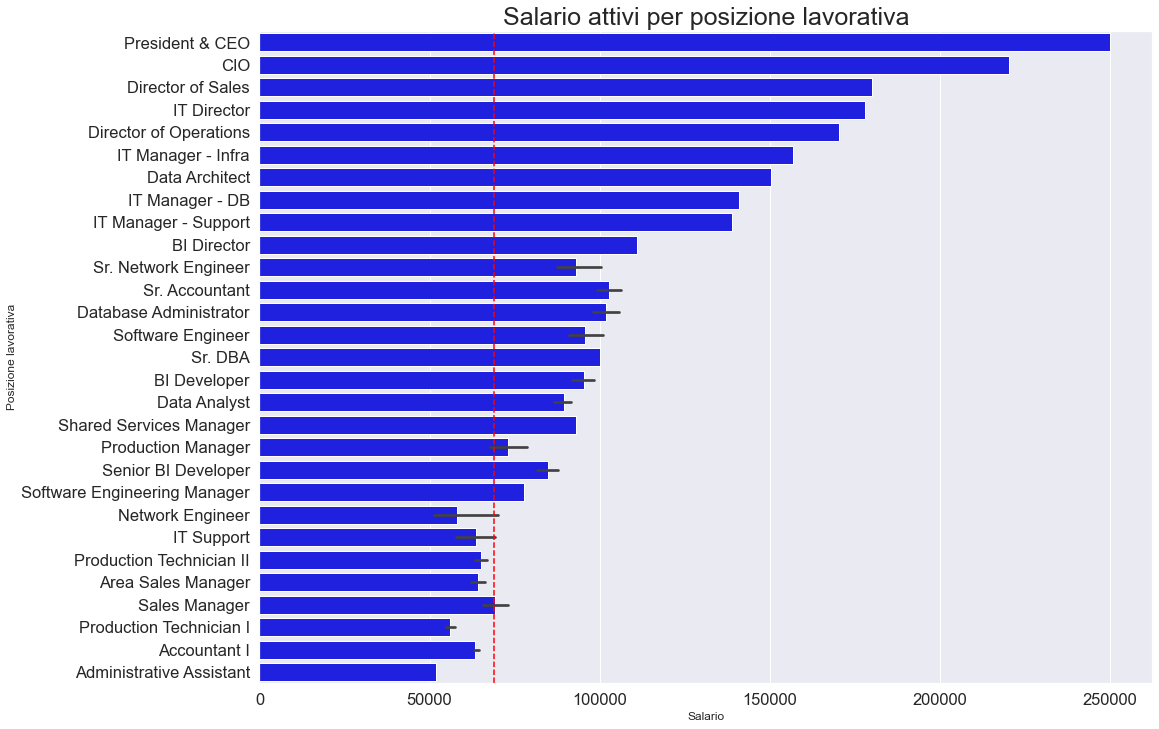

In [63]:
# definiamo un dataset contenente soltanto i dipendenti ancor attivi ordinati per salario discendente
df_sal = df_active.sort_values('Salary', ascending=False)
grandezzaGrafico(16,12)
sns.barplot(x='Salary',y='Position', data=df_sal, color = 'b')
plt.axvline(df['Salary'].mean(), color='r', linestyle='--')
plt.title('Salario attivi per posizione lavorativa', fontsize=25)
plt.xlabel('Salario')
plt.ylabel('Posizione lavorativa')
plt.show()

### Salario e progetti speciali 

In [64]:
df_sp = df.copy()
df_sp['SpecialProjectsCount']= df_sp['SpecialProjectsCount'].astype(str)
df_sp = df_sp.sort_values('SpecialProjectsCount', ascending = True)
fig = px.box(df_sp, y="SpecialProjectsCount", x="Salary",height = 650, width = 800, title = 'Salario per numero di progetti speciali', labels = {'SpecialProjectsCount': 'Numero progetti speciali', 'Salary': 'Salario'})
fig.show()

In [65]:
df_sp_norm = df_salario_normalizzato.copy()
df_sp_norm['SpecialProjectsCount']= df_sp_norm['SpecialProjectsCount'].astype(str)
df_sp_norm = df_sp_norm.sort_values('SpecialProjectsCount', ascending = True)
fig = px.box(df_sp_norm, y="SpecialProjectsCount", x="Salary",height = 650, width = 800, title = 'Salario per numero di progetti speciali', labels = {'SpecialProjectsCount': 'Numero progetti speciali', 'Salary': 'Salario'})
fig.show()

### Progetti speciali per reparto

In [66]:
special_proj_dep = df.groupby(['Department'])['SpecialProjectsCount'].sum().reset_index()
special_proj_dep

,Department,SpecialProjectsCount
0,Admin Offices,33
1,Executive Office,0
2,IT/IS,296
3,Production,4
4,Sales,0
5,Software Engineering,46


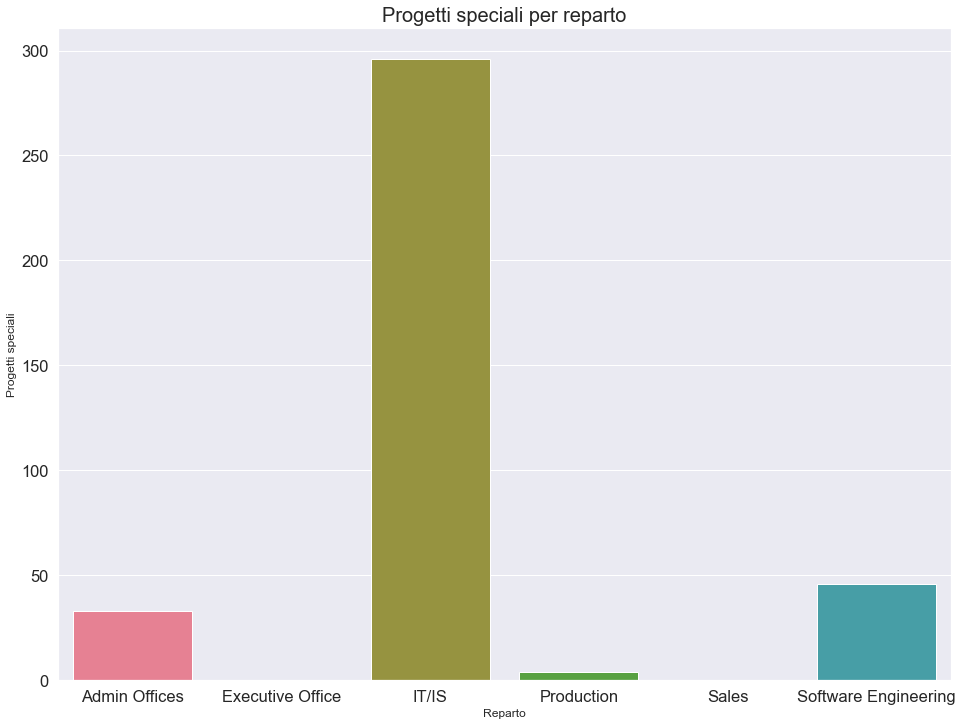

In [67]:
sns.barplot(x = "Department", y = "SpecialProjectsCount", data = special_proj_dep, ci = None)
plt.title("Progetti speciali per reparto", fontsize=20)
plt.ylabel('Progetti speciali')
plt.xlabel('Reparto')
plt.show()

### Performance e soddisfazione

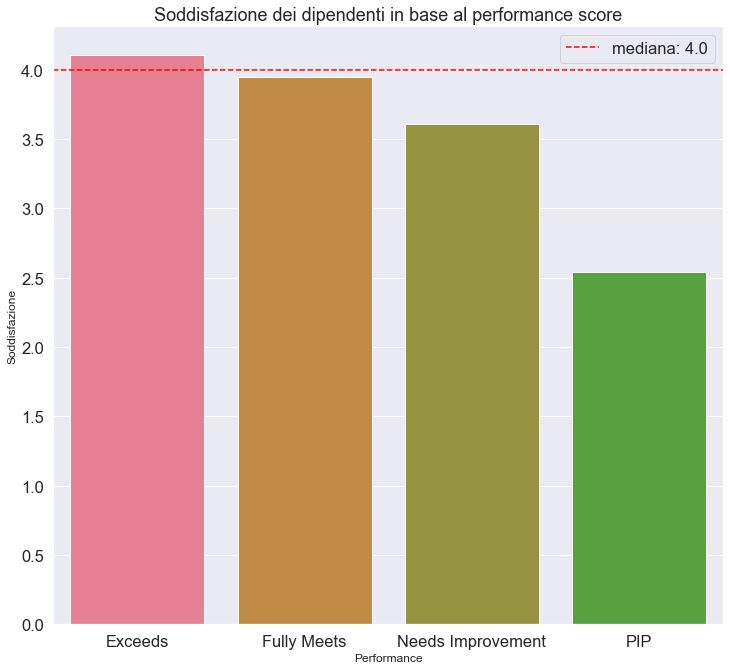

In [68]:
grandezzaGrafico(12,11)
mediana_soddisfazione = df.EmpSatisfaction.median()

sns.barplot(x = "PerformanceScore", y = "EmpSatisfaction", data = df, ci = None)
plt.title('Soddisfazione dei dipendenti in base al performance score', fontsize=18)
plt.ylabel('Soddisfazione')
plt.xlabel('Performance')
plt.axhline(mediana_soddisfazione, color = 'red', linestyle = '--', label=f'mediana: {round(mediana_soddisfazione,2)}')
plt.legend(loc=0)
plt.show()

### Performance per etnia

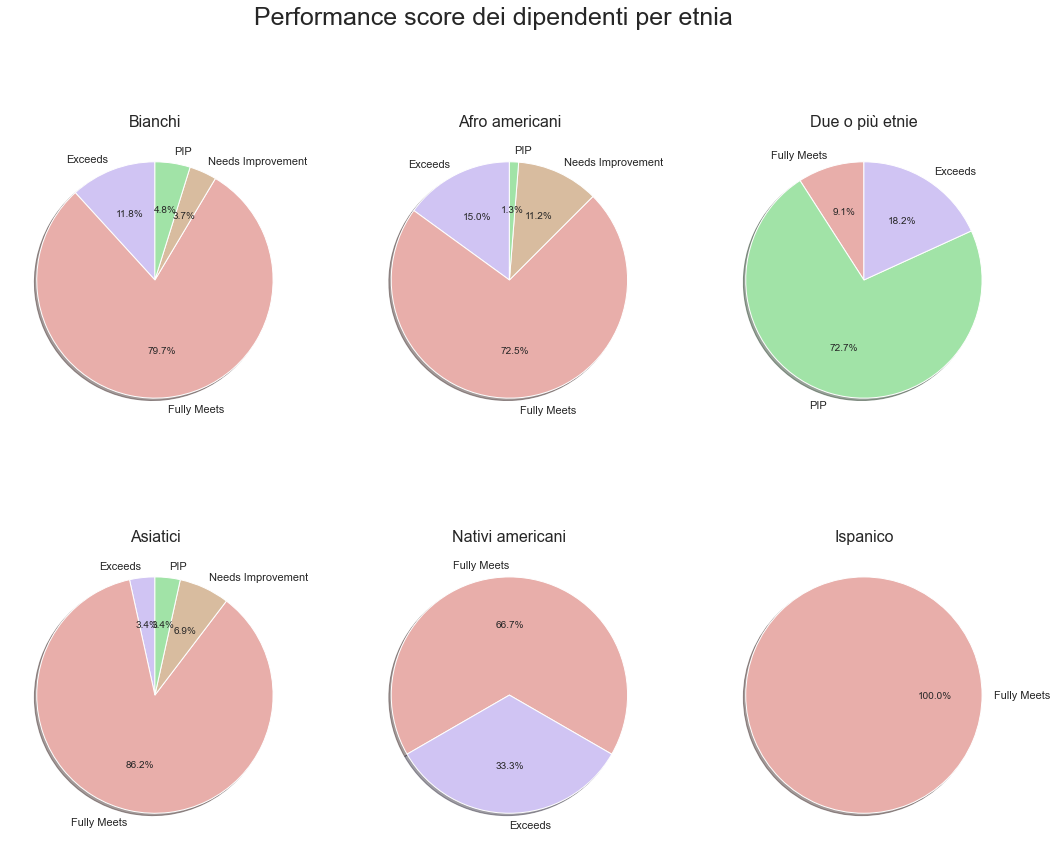

In [69]:
df_white = df[df['RaceDesc'] == 'White']
df_black = df[df['RaceDesc'] == 'Black or African American']
df_more = df[df['RaceDesc'] == 'Two or more races']
df_asia = df[df['RaceDesc'] == 'Asian']
df_ind = df[df['RaceDesc'] == 'American Indian or Alaska Native']
df_hisp = df[df['RaceDesc'] == 'Hispanic']

labels = list(df['PerformanceScore'].unique())
labels_more = df_more['PerformanceScore'].unique().tolist()
labels_hisp = list(df_hisp['PerformanceScore'].unique())
labels_ind = df_ind['PerformanceScore'].unique().tolist()

sizes_w = calcolaSizes(df_white, labels, 'PerformanceScore')
sizes_b = calcolaSizes(df_black, labels, 'PerformanceScore')
sizes_more = calcolaSizes(df_more, labels, 'PerformanceScore')
sizes_asia = calcolaSizes(df_asia, labels, 'PerformanceScore')
sizes_ind = calcolaSizes(df_ind, labels_ind, 'PerformanceScore')
sizes_hisp = calcolaSizes(df_hisp, labels_hisp, 'PerformanceScore')

grandezzaGrafico(18,14)
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize": 16,"axes.labelsize": 12})

plt.subplot(2,3,1)
plt.suptitle('Performance score dei dipendenti per etnia', fontsize=25)
plt.pie(sizes_w, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors3)
plt.title('Bianchi')

plt.subplot(2,3,2)
plt.pie(sizes_b, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors3)
plt.title('Afro americani')

plt.subplot(2,3,3)
plt.pie(sizes_more, labels=labels_more, autopct='%1.1f%%',
        shadow=True, startangle=90, colors= ['#E8AEAA', '#A1E3A7', '#D0C4F3'])
plt.title('Due o più etnie')

plt.subplot(2,3,4)
plt.pie(sizes_asia, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors3)
plt.title('Asiatici')

plt.subplot(2,3,5)
plt.pie(sizes_ind, labels=labels_ind, autopct='%1.1f%%',
        shadow=True, startangle=330, colors=['#E8AEAA','#D0C4F3'])
plt.title('Nativi americani')

plt.subplot(2,3,6)
plt.pie(sizes_hisp, labels=labels_hisp, autopct='%1.1f%%',
        shadow=True, startangle=180, colors=['#E8AEAA'])
plt.title('Ispanico')


plt.show()

### Performance per reparto

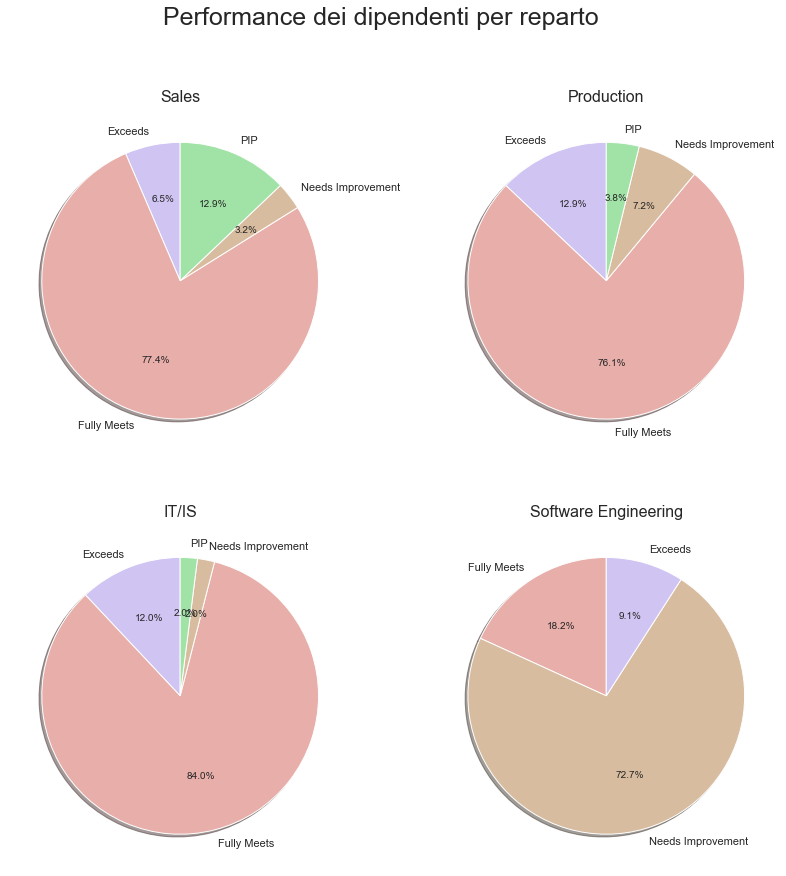

In [70]:
df_production = df[df['Department']=='Production']
df_sales = df[df['Department']=='Sales']
df_ITIS = df[df['Department']=='IT/IS']
df_software = df[df['Department']=='Software Engineering']
labels = df.PerformanceScore.unique().tolist()
labels_soft = df_software.PerformanceScore.unique().tolist()

sizes_sales = calcolaSizes(df_sales, labels, 'PerformanceScore')
sizes_production = calcolaSizes(df_production, labels, 'PerformanceScore')
sizes_ITIS = calcolaSizes(df_ITIS, labels, 'PerformanceScore')
sizes_software = calcolaSizes(df_software, labels, 'PerformanceScore')

plt.rcParams["figure.figsize"] = [14,14]

plt.subplot(2,2,1)
plt.pie(sizes_sales, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors3)
plt.suptitle('Performance dei dipendenti per reparto', fontsize=25)
plt.title('Sales')
plt.subplot(2,2,2)
plt.pie(sizes_production, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors3)
plt.title('Production')
plt.subplot(2,2,3)
plt.pie(sizes_ITIS, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors3)
plt.title('IT/IS')
plt.subplot(2,2,4)
plt.pie(sizes_software, labels = labels_soft, autopct='%1.1f%%', shadow=True, startangle=90, colors= ['#E8AEAA', '#D8BC9F', '#D0C4F3'])
plt.title('Software Engineering')
plt.show()

### Soddisfazione per reparto

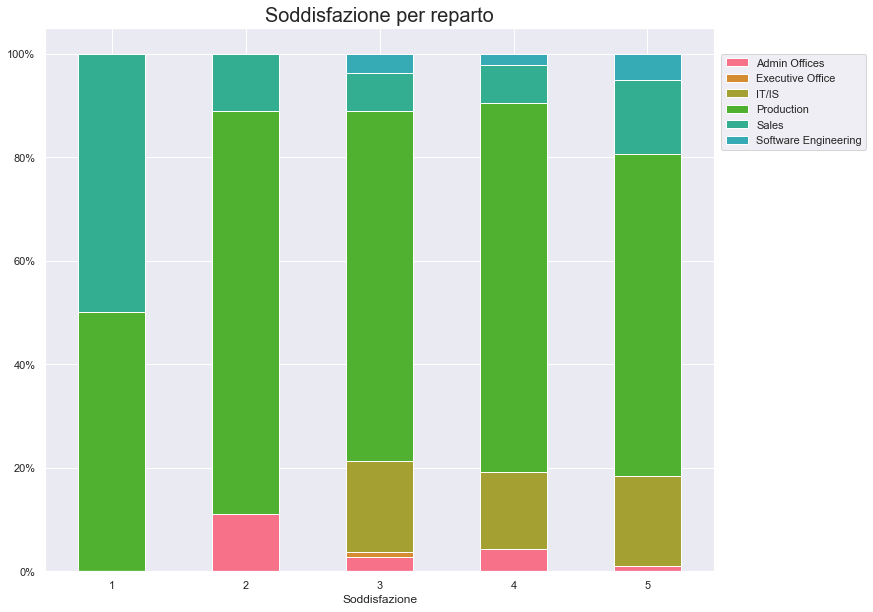

In [71]:
import matplotlib.ticker as mtick # libreria per formattare i valori dell'asse y in percentuale

grandezzaGrafico(12, 10)
df_dep_sat = df['Department'].groupby(df['EmpSatisfaction']).value_counts(normalize=True).unstack(1)
ax = df_dep_sat.plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=360)
plt.xlabel('Soddisfazione')
plt.title('Soddisfazione per reparto', fontsize=20)
plt.legend(loc=(1.01,0.775))
plt.show()

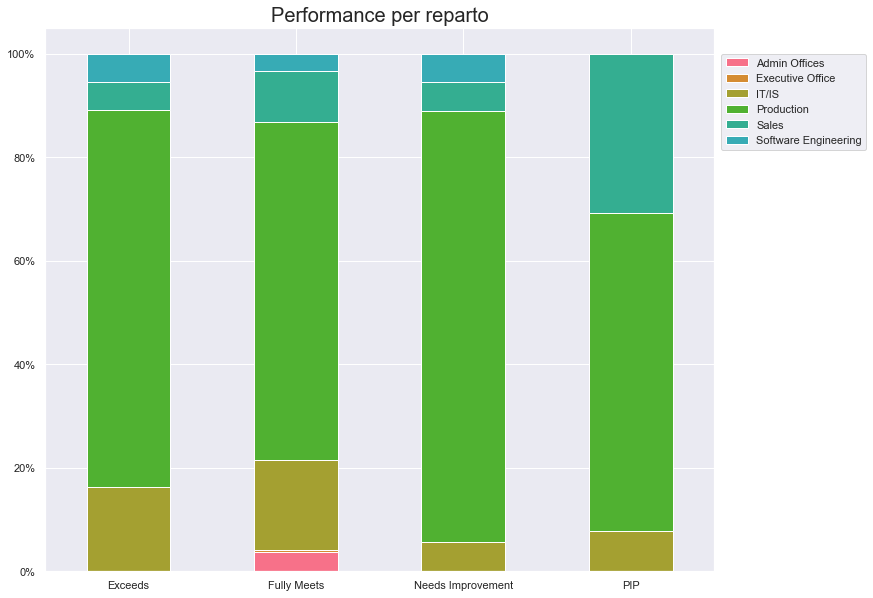

In [72]:
df_dep_perf = df['Department'].groupby(df['PerformanceScore']).value_counts(normalize=True).unstack(1)
ax = df_dep_perf.plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 
plt.xticks(rotation=360)
plt.xlabel('')
plt.title('Performance per reparto', fontsize=20)
plt.legend(loc=(1.01,0.775))
plt.savefig('Performance.png')
plt.show()

### Performance e coinvolgimento

In [73]:
df[['PerformanceScore', 'EngagementSurvey']].pivot(columns='PerformanceScore', values='EngagementSurvey').iplot(kind='box')

### Giorni medi di assenza per reparto

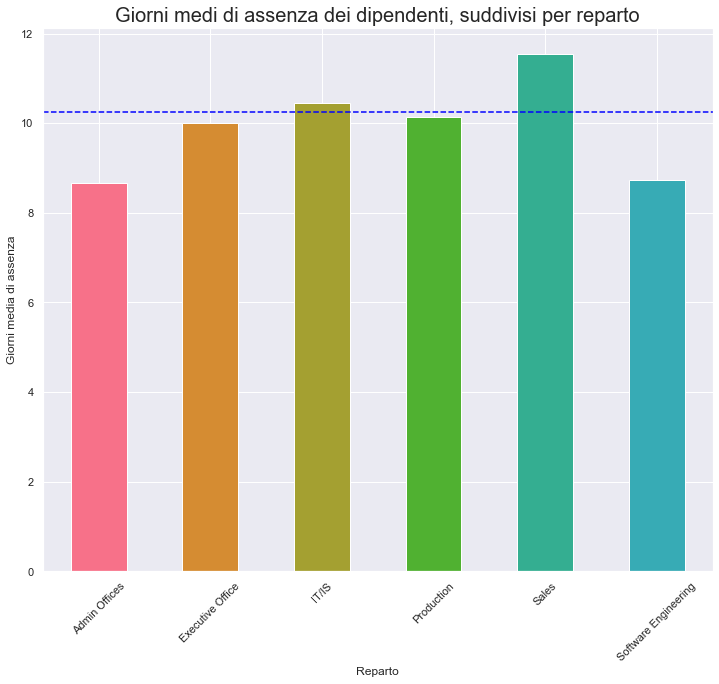

In [74]:
df_absence = df.groupby(['Department']).mean()['Absences']

df_absence.plot(kind='bar', color = color_palette)
plt.axhline(df['Absences'].mean(), color = 'blue', linestyle = '--')
plt.title("Giorni medi di assenza dei dipendenti, suddivisi per reparto",fontsize=20)
plt.xlabel("Reparto")
plt.ylabel("Giorni media di assenza")
plt.xticks(rotation=45)
plt.show()

### Motivi di fine rapporto lavorativo nel reparto produzione

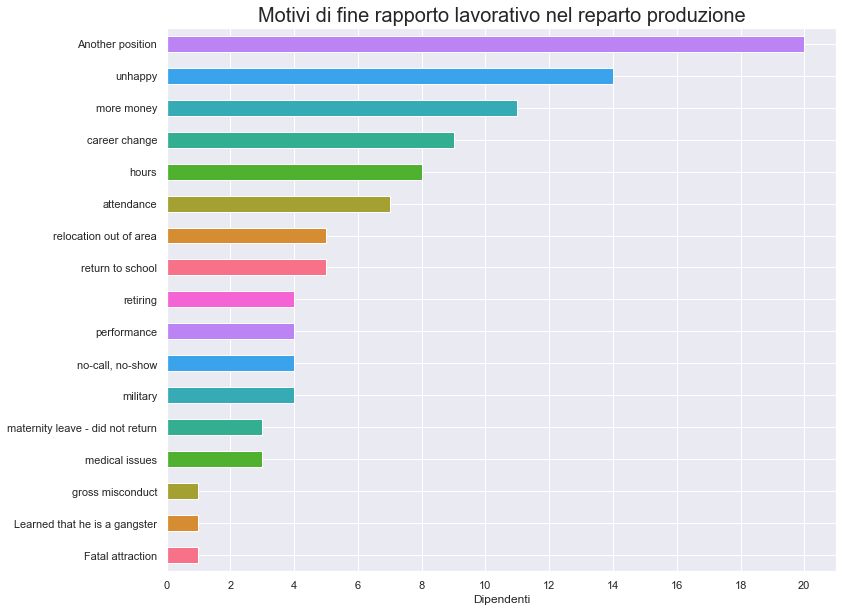

In [75]:
df_terminated = df.loc[df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])]
term_production = df_terminated.groupby(['TermReason']).count()['Employee_Name']
term_production = term_production.sort_values(ascending = True)

term_production.plot(kind="barh", color = color_palette)
grandezzaGrafico(12, 8)
plt.title("Motivi di fine rapporto lavorativo nel reparto produzione", fontsize=20)
plt.ylabel('')
plt.xlabel('Dipendenti')
plt.xticks(np.arange(0,21,2))
plt.show()